In [ ]:
%pip install datasets
%pip install numpy
%pip install matplotlib
%pip install Pillow
%pip install opencv-python
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import os
from datasets import load_dataset
import random
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torch

In [ ]:
# class DatasetReceipt(Dataset):
#     def __init__(self, hf_datasets=None, local_folder=None, local_format="csv"):
#         """
#         Parameters:
#         - hf_datasets: list berisi nama dataset dari Hugging Face (string)
#         - local_folder: path ke folder yang berisi dataset lokal
#         - local_format: format dataset lokal, default "csv", bisa "parquet" atau lainnya
#         """
#         self.data = []

#         # Load dataset dari Hugging Face
#         if hf_datasets:
#             for dataset_name in hf_datasets:
#                 dataset = load_dataset(dataset_name, split="train")  # Load train split
#                 for item in dataset:
#                     self.data.append({"text": item["text"], "label": item.get("label", -1)})  # Sesuaikan kolomnya

#         # Load dataset dari folder lokal
#         if local_folder:
#             for file in os.listdir(local_folder):
#                 file_path = os.path.join(local_folder, file)
#                 if file.endswith(".csv") and local_format == "csv":
#                     df = pd.read_csv(file_path)
#                 elif file.endswith(".parquet") and local_format == "parquet":
#                     df = pd.read_parquet(file_path)
#                 else:
#                     continue

#                 for _, row in df.iterrows():
#                     self.data.append({"text": row["text"], "label": row.get("label", -1)})

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):
#         return self.data[idx]


In [ ]:
# dataset_international = load_dataset("katanaml-org/invoices-donut-data-v1")
# sample_image_international = dataset_international['train'][0]['image']
# print(sample_image_international)

# plt.imshow(sample_image_international)
# plt.axis("off")
# plt.show()

# mean = np.array([0.485])
# std = np.array([0.229])

# def resize_image(image):
#     """ Convert PIL image to NumPy array and resize """
#     if isinstance(image, Image.Image):  # Jika image berupa PIL.Image, konversi ke NumPy array
#         image = np.array(image)

#     if not isinstance(image, np.ndarray):
#         raise ValueError("resize_image: Input harus berupa NumPy array")

#     return cv2.resize(image, (600, 600))

# def grey_image(image):
#     """ Convert image to grayscale """
#     if isinstance(image, Image.Image):
#         image = np.array(image)

#     if not isinstance(image, np.ndarray):
#         raise ValueError("grey_image: Input harus berupa NumPy array")

#     return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# def normalize_image(image):
#     """ Normalize image using mean and std """
#     if isinstance(image, Image.Image):
#         image = np.array(image)

#     if not isinstance(image, np.ndarray):
#         raise ValueError("normalize_image: Input harus berupa NumPy array")

#     image = image / 255.0
#     image = (image - mean) / std

#     return Image.fromarray((image * 255).astype(np.uint8))  # Kembalikan ke PIL image

# def preprocess(batch):
#     try:
#         batch['image'] = [resize_image(img) for img in batch['image']]
#         batch['image'] = [grey_image(img) for img in batch['image']]
#         # batch['image'] = [normalize_image(img) for img in batch['image']]

#         return batch
#     except Exception as e:
#         print(f"Error dalam preprocess: {e}")
#         return batch  # Supaya tidak crash

# dataset_international = dataset_international.map(preprocess, batched=True, num_proc=1)  # Gunakan num_proc=1 dulu

# sample_image_international_normalization = dataset_international['train'][0]['image']
# print(sample_image_international_normalization)

# plt.imshow(sample_image_international_normalization)
# plt.axis("off")
# plt.show()

In [ ]:
import numpy as np
import cv2
from PIL import Image
from datasets import load_dataset
import tensorflow as tf
import json

class DatasetReceipt:
    def __init__(self, dataset_name="naver-clova-ix/cord-v2", split="train", task="total_price"):
        # Load dataset dari Hugging Face
        self.dataset = load_dataset(dataset_name, split=split)
        self.task = task  # Tambahkan parameter task

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        image = sample["image"]

        # Preprocessing gambar
        image = self.resize_image(image)
        image = self.grey_image(image)
        image = tf.convert_to_tensor(image, dtype=tf.float32)  # Konversi ke tensor
        image = tf.expand_dims(image, axis=-1)  # Tambahkan channel dimension (600, 600, 1)

        # **Ambil label berdasarkan task**
        label = self.extract_label(sample, self.task)
        label = tf.convert_to_tensor(label, dtype=tf.float32)  # Konversi label ke tensor

        return {"image": image, "label": label}

    def extract_label(self, sample, task):
        """Ekstraksi label sesuai task dari ground_truth JSON"""
        try:
            gt_data = json.loads(sample["ground_truth"])["gt_parse"]
            if task == "total_price":
                total_price = sum([int(item["price"].replace(",", "")) for item in gt_data["menu"]])
                return total_price
            elif task == "menu_items":
                return [item["nm"] for item in gt_data["menu"]]
            else:
                return -1  # Jika task tidak dikenal
        except Exception as e:
            print(f"Error parsing label: {e}")
            return -1  # Return nilai default jika parsing gagal

    @staticmethod
    def resize_image(image):
        """Konversi gambar ke NumPy array dan resize"""
        if isinstance(image, Image.Image):
            image = np.array(image)
        return cv2.resize(image, (600, 600))

    @staticmethod
    def grey_image(image):
        """Konversi gambar ke grayscale"""
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=864x1296 at 0x266A6F25110>


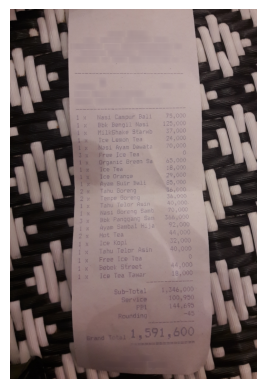

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

In [ ]:
# # Example usage
# if __name__ == "__main__":
#     # Load dataset
#     dataset = load_dataset("naver-clova-ix/cord-v2")
#     sample_image = dataset['train'][0]['image']
#     print(sample_image)

#     # Display sample image
#     plt.imshow(sample_image)
#     plt.axis("off")
#     plt.show()

#     # Create DatasetReceipt instance
#     receipt_dataset = DatasetReceipt()

#     # Preprocess the dataset
#     dataset = dataset.map(receipt_dataset.preprocess, batched=True, num_proc=1)  # Use num_proc=1 for now

#     # Display preprocessed sample image
#     sample_image_normalization = dataset['train'][0]['image']
#     print(sample_image_normalization)

#     plt.imshow(sample_image_normalization, cmap='gray')
#     plt.axis("off")
#     plt.show()

In [2]:
# !pip install datasets

# from datasets import load_dataset

# dataset_name = "naver-clova-ix/cord-v2"
# split = "train"

# dataset = load_dataset(dataset_name, split=split)

# # Lihat contoh data pertama
# print(dataset[0])
# print(dataset.column_names)

# !pip install numpy
# import numpy as np

# labels = [example["label"] for example in dataset]  # Ganti "label" sesuai dengan kolom yang ditemukan
# num_classes = len(np.unique(labels))

# print("Jumlah kelas:", num_classes)

# sample = dataset[0]["label"]  # Ganti "label" dengan nama kolom yang benar
# num_classes = len(sample)

# print("Jumlah kelas:", num_classes)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

(…)-00000-of-00004-b4aaeceff1d90ecb.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

(…)-00001-of-00004-7dbbe248962764c5.parquet:   0%|          | 0.00/441M [00:00<?, ?B/s]

(…)-00002-of-00004-688fe1305a55e5cc.parquet:   0%|          | 0.00/444M [00:00<?, ?B/s]

(…)-00003-of-00004-2d0cd200555ed7fd.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

(…)-00000-of-00001-cc3c5779fe22e8ca.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

(…)-00000-of-00001-9c204eb3f4e11791.parquet:   0%|          | 0.00/234M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/800 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=864x1296 at 0x78DF09EBCB10>, 'ground_truth': '{"gt_parse": {"menu": [{"nm": "Nasi Campur Bali", "cnt": "1 x", "price": "75,000"}, {"nm": "Bbk Bengil Nasi", "cnt": "1 x", "price": "125,000"}, {"nm": "MilkShake Starwb", "cnt": "1 x", "price": "37,000"}, {"nm": "Ice Lemon Tea", "cnt": "1 x", "price": "24,000"}, {"nm": "Nasi Ayam Dewata", "cnt": "1 x", "price": "70,000"}, {"nm": "Free Ice Tea", "cnt": "3 x", "price": "0"}, {"nm": "Organic Green Sa", "cnt": "1 x", "price": "65,000"}, {"nm": "Ice Tea", "cnt": "1 x", "price": "18,000"}, {"nm": "Ice Orange", "cnt": "1 x", "price": "29,000"}, {"nm": "Ayam Suir Bali", "cnt": "1 x", "price": "85,000"}, {"nm": "Tahu Goreng", "cnt": "2 x", "price": "36,000"}, {"nm": "Tempe Goreng", "cnt": "2 x", "price": "36,000"}, {"nm": "Tahu Telor Asin", "cnt": "1 x", "price": "40,000."}, {"nm": "Nasi Goreng Samb", "cnt": "1 x", "price": "70,000"}, {"nm": "Bbk Panggang Sam", "cnt": "3 x", "price": "3